<a href="https://colab.research.google.com/github/S-Soluel/CS_167_Colab_Files/blob/main/Project1_SamSolheim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Project 1*
**Name: Sam Solheim**


---
## Data Descriptions
---
The dataset utilized throughout the course of this project is the "Hotel Reservation Dataset" sourced from Kaggle user Ahsan Raza. This dataset provides information on more than 30,000 hotel reservations, along with information such as what type of room was reserved, the number of adults and children the reservation is for, and ultimately whether the reservation was cancelled or not. 
> [Hotel Reservation Dataset | Ahsan Raza](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

### _Target Variable:_
For this project, I chose to use `booking_status` as the target variable we aim to predict. In this case, the target variable has two classes which are `Canceled` or `Not_Canceled`. Over the course of this project, I aim to discover which predictor variables best help us to predict whether a reservation is honored, or cancelled. 


By utilizing kNN and weighted kNN algorithms, Decision Trees, and Random Forest models, we can look into predicting whether customers at a hotel will honor their reservations, or end up cancelling them. Since the response variable is binary and non-numeric, this will be a __classification__. 

### _Predictor Variables:_
The following columns were chosen to be predictor variables, of which there are three categorical variables that needed to be converted into dummy variables. 

---
| Numeric Variables | Description  |
|---|---|
|no_of_adults | # of adults listed on reservation |
|no_of_children | #  of children listed on reservation|
|no_of_weekend_nights | # of days reserved on the weekend |
|no_of_week_nights | # of days reserved during the week |
|lead_time | # of days between booking and reservation |
|avg_price_per_room | Avg price of reserved room *(in euros)* |
|arrival_month | Month of reservation |
|no_of_special_requests | Special requests made |

---

| Categorical Variables | Description | Additional Notes |
|---|---|---|
|type_of_meal_plan | Meal plan listed on reservation | var. with 4 levels |
|market_segment_type | Market reservation is segmented towards | var. with 5 levels |
| room_type_reserved |Room type of reservation _(encoded)_ | var. with 7 levels |
|required_car_parking_space | Whether parking is required | 0 = No, 1 = Yes |
|repeated_guest |Whether customers have stayed before | 0 = No, 1 = Yes|


### _Research Questions:_

1. How do variables such as `no_of_adults`, `no_of_children`, ..., `required_car_parking_space`, and `repeated_guest` affect whether a reservation at a hotel is *honored*, or *cancelled*?

2. In general, how accurately can we predict `hotel_status` with our set of predictor variables? *(detailed above)*

### _Metrics:_
As the response variable is binary, this is a Classification that we are trying to predict the results of. While we can use MSE and $R^2$ for Regression models, this would not be useful in the case of a Classification. This is due to the fact that in a Classification, any single prediction for an observation is either correct, or incorrect, with no space between. 


> For this reason, the metric __$accuracy$__ will be used to determine how well any individual model performs.

---
## Data Preparation:
---

In order to create models to predict booking_status, I first needed to work through the following steps to clean my data, and get it ready for use. 
> 1. Load in Dataset
1. Account for Null Values
1. Get Dummy Variables
1. Split into Training & Testing Data

### _Load in Dataset:_
Before we can do anything to the dataset, first it needs to be loaded into the coding environment. 


In [3]:
# load in the data and necessary libraries
import sklearn # Import sklearn and necessary sublibraries
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler # Import StandardScaler for normalization

# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
hotel_res = pd.read_csv('/content/drive/MyDrive/JTerm2023/datasets/Hotel_Reservations.csv')
hotel_res.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### _Account for Null Values:_
After loading in the data, we can check to see if there are null values in any of the columns. In the case of the data I used, there surprisingly were no null or missing values. This was surprising since the vast majority of datasets we will work with in the 'real world' will have messy data, and at least several missing pieces of information. Since there were none in this dataset, this step took much less time than it usually would. 

In [5]:
print(hotel_res.isna().any())
# Looks like there are no missing values in our data, that's a good thing, and should hopefully speed up the data cleaning process
hotel_res.shape # 36,275 observations with 19 variables

# The overall goal of this analysis: seeing whether certain variables are better / worse at 
# predicting whether a hotel reservation will be cancelled, or not.

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool


(36275, 19)

### _Get Dummy Variables:_
The next step was getting dummy variables for any of the categorical columns that were not already segmented that way. The three variables that this applied to are `type_of_meal_plan`, `market_segment_type`, and `room_type_reserved`, which all have at least three levels. 

Through the use of `pd.get_dummies()`, I was able to quickly have these three variables converted into dummy variables that could be easily utilized with the libraries in this project. 

As an additional note, the __response variable__ had to be converted into a dummy variable too. This is because it contained string values, and Google Colab kept throwing error messages about the response variable not being numeric. After converting it into two dummy variables, only the level `booking_status_Canceled` was chosen as the target variable. The following table provides further context on how the response variable was altered, and which level in booking_status corresponds to the numeric equivalent used in the dummy variable. 

| Levels in booking_status | Numeric Equivalent in booking_status_Canceled |
|---|---|
| Canceled | 1 |
| Not_Canceled | 0 |


#### _Dummy Variable Code:_

In [7]:
hotel_res.columns
# Going to use booking_status as our response variable, will be dropping unnecessary variables that aren't going to be used in this analysis. 

not_used = ["Booking_ID", "arrival_year", "arrival_date", "no_of_previous_bookings_not_canceled", "no_of_previous_cancellations"]
# Getting names of only the variables that will be used later in the models
base_columns = hotel_res.columns.drop(not_used)
# Then, drop the response variable
target = 'booking_status'

print(base_columns)

# Implementing for loop to go through the variables that will be used. 
# This'll allow me to see which need to be changed from categorical variables to the numeric equivalent. 
for k in base_columns:
  print(k, "has the following unique levels:")
  print(hotel_res[k].unique())
  print()

needs_cleaning = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

# Variables to change from categorical to numeric:
# type_of_meal_plan, room_type_reserved, and market_segment_type
for k in needs_cleaning:
  print(k, "has the following unique levels:")
  print(hotel_res[k].unique())
  print()


type_of_meal_plan has the following unique levels:
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

room_type_reserved has the following unique levels:
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

market_segment_type has the following unique levels:
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']



In [8]:
# Cleaning vars - type_of_meal_plan, room_type_reserved, and market_segment_type
# need to get dummy variables for these three categorical variables
  # Hold up Sam... we can just use pd.get_dummies() to get dummy variables...
  # Please don't try writing something from scratch

hotel_res_w_dummies = pd.get_dummies(hotel_res, columns = needs_cleaning)
hotel_res_w_dummies.head()
hotel_res_w_dummies.columns
# yeah that was a lot easier... oops?

hotel_res_w_dummies = pd.get_dummies(hotel_res_w_dummies, columns = [target])
print(hotel_res_w_dummies.columns)


# Troubleshooting: attempting to get the correct outputs when splitting my training and testing data
predictors_with_dummies = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'required_car_parking_space',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'lead_time', 'arrival_month', 
       'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'repeated_guest', 'avg_price_per_room',
       'no_of_special_requests']

print(len(predictors_with_dummies))

target_with_dummies = 'booking_status_Canceled'


Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'booking_status_Canceled', 'booking_status_No

#### Bump #1: Forgot About `pd.getDummies`

The first 'bump in the road' that I experienced came about when I was getting ready to make the dummy variables for my predictors that were categorical. 

For a solid hour or so, I forgot that `pd.getDummies` was a thing, and I began attempting to create a formula from scratch to turn my input variables into numeric dummies. 

Thankfully, I had a nagging sense in the back of my mind that there was a simpler way to accomplish my goals, and I was able to remember about the proper Python libraries after re-reading the Project 1 description. 

In [ ]:
# Wow this'll be fun

#for k in needs_cleaning:
 #   for i in hotel_res_clean[k]:
 #     # Need to implement three big else/if sections. 1 for each variable needing to be converted
 #     if k == 'room_type_reserved':
 #   
 #     if hotel_res_clean[k][i] == 'Room_Type 1':
 #       hotel_res_clean[k][i] = 1
#      else
      #'Room_Type 4'
      #'Room_Type 2'
      #'Room_Type 6'
      #'Room_Type 5'
      #'Room_Type 7'
      #'Room_Type 3'

# Ignore me going down a bit of a rabbit hole and realizing I didn't need to partway through


### _Split into Training & Testing Data:_

Finally we've reached the last stage in data preparation: splitting the data into training and testing sets.

I decided to go with the standard 80/20 split of training and testing data. Shown below is the code that was used to achieve this. 

#### Bump #2: Removing Column Name from `train_sln` & `test_sln`

This issue became a problem when I went to create my models, and they kept outputting an error that I was inputting a 'y-column vector' when it wasn't supposed to. To resolve this, I decided to refer back to our coding examples from class on how we had previously split the data into test and training sets, and my mistake was annoyingly simple. 

What I wrote:
- target_with_dummies = ['booking_status_Canceled']
What the correct answer was:
- target_with_dummies = 'booking_status_Canceled'

Thankfully, after fixing this issue I was easily able to remove that error, and get `train_sln` and `test_sln` to have the correct dimensions. 


In [9]:
# Split the data into training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(hotel_res_w_dummies[predictors_with_dummies], 
                                                              hotel_res_w_dummies[target_with_dummies], 
                                                              test_size = 0.2, random_state = 13)

# Found the issue that was making it have the column name when we didn't want it to keep that
# used target = ['booking_status'] when it needed to be target = 'booking_status' instead
print(train_data.shape)
print(train_sln.shape)
print(test_data.shape)
print(test_sln.shape)

train_data.head()


# Looks good, finally can start making models

(29020, 26)
(29020,)
(7255, 26)
(7255,)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,required_car_parking_space,room_type_reserved_Room_Type 1,...,lead_time,arrival_month,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest,avg_price_per_room,no_of_special_requests
14887,2,1,0,2,1,0,0,0,0,1,...,44,10,0,0,0,1,0,0,100.00,0
14659,2,0,0,2,1,0,0,0,1,1,...,159,7,0,0,0,0,1,0,105.30,0
28466,2,0,2,3,1,0,0,0,0,1,...,63,4,0,0,0,0,1,0,99.79,1
29204,2,1,0,2,1,0,0,0,0,0,...,5,12,0,0,0,0,1,0,181.00,0
21606,1,0,1,2,1,0,0,0,0,1,...,26,10,0,0,0,1,0,0,77.00,0


---
## Baseline Performance:
---
Before model creation, I additionally needed to create a baseline utilizing dummy variables to see what the threshold for a good model should be. As this is a classifier exercise, the baseline model created was a `DummyClassifier` that had an accuracy as listed below: 

| Baseline Model | Accuracy |
|---|---|
| Dummy Classifier |0.5008 |

Additionally, it should be noted that this baseline model utilized the `uniform` method of prediction, which simply means that trained on data by randomly predicting one class or the other. As there were two possible options, it should be rather unsurprising that the accuracy was around 0.5008. 

Our goal is to create models that can predict the correct outcome better than this baseline model, and we simply will throw out the models that do not have an $accuracy > 0.5008$.


In [10]:
# Dummy Variable Classifier Example
# Creating a baseline

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dummy_preds = predictors_with_dummies
target= 'booking_status_Canceled'

train_data, test_data, train_sln, test_sln = train_test_split(hotel_res_w_dummies[dummy_preds], hotel_res_w_dummies[target], test_size = 0.2, random_state=9)

dummy_clf = DummyClassifier(strategy='uniform') #make random guesses
dummy_clf.fit(train_data, train_sln)
preds = dummy_clf.predict(test_data)

print('Accuracy: ', accuracy_score(test_sln, preds))

# From utilizing this baseline, we can see that what we *truly* need to predict better than for any of these models to be successful
# is an accuracy greater than 0.5016 which represents our 'naive' method of prediction.


Accuracy:  0.5006202618883528


---
## Model Planning and Execution:
---

### _Learning Algorithms in Use:_
The learning algorithms used in this project were kNN and weighted kNN algorithms, decision trees, and random forests. These were utilized with non-normalized data, normalized data, and with their respective parameters being tuned. 




#### kNN Model:

For the model that utilizes the kNN algorithm, the parameter that was tuned is $k$, the number of neighbors that were utilized in the analysis. 

#### w-kNN Model:
With the weighted kNN model, the parameter $k$ was tuned the same way as in the kNN-based model. Over the course of my project, I utilized the same values of $k$ for these two models. 
Rather interestingly, the w-kNN model's accuracy increased with $k$, but the accuracy decreased with $k$ in regards to the kNN model. 

#### Decision Tree Model:
For the decision tree model, the parameter of interest when it came time to tune the model was $m$, which represents `max_leaf_nodes`. By tuning this parameter, I was able to understand how exactly will changes in $m$ affect the accuracy of the overall model. 

#### Random Forest Model:
As for the final model being a random forest, the parameter of interest was $n$: this is represented in the code by `n_estimators`. This essentially represents how many individual trees are within the forest. 


---
## Results:
---

As for the results of this project, the findings were rather interesting at times. My results section is split into three parts:
1. Models with Non-Normalized Data
2. Models with Normalized Data, and
3. Parameter Tuning for Each Model

I believe the most interesting discovery with this data was how, overall, normalization helped models to increase their accuracy or at least not decrease below the accuracy of their non-normalized counterparts. Yet, despite this my w-kNN model performed at a noticeably lower accuracy on the normalized data. My reasoning for this will be explored further in Section 2 of my results. 

| Model | Non-Normalized | Normalized | Parameter Tuned |
|:---:|:---:|:---:|:---:|
| kNN |0.8186 | 0.8186 | **0.8212**|
| w-kNN |0.8186 |0.6795 | **0.8485**|
| Decision Tree |0.8207 |0.8207 |  **0.8332** |
| Random Forest |0.9016 | 0.9016| **0.9024** |




### Models with Non-Normalized Data:
The following section details the results of research with the kNN, w-kNN, decision tree, and random forest models on non-normalized data. 

####kNN Model Results:

For the kNN model based on non-normalized data, I found that the $accuracy = 0.8186$. Already this is beating the dummy model that I created, which is great. 

Additionally, we can see that there were 599 instances of false positives (Prediction: Canceled), and 717 instances of false negatives (Prediction: Not_Canceled) in this model. Personally, minimizing both of these is important, but as a business the hotel chain should be more worried about getting the false negatives minimized. 

*False positives* would be better for the hotel chain since that would mean someone we predicted would cancel their reservation actually honored it, while a *false negative* would mean that we predicted a customer would not cancel their reservation, but they really canceled it. 

The more false negatives we have, the less effective this model will be for our business practices. After all, we would then have to scramble to get those previously reserved rooms rented out to different customers, and would not have the money from the original customers. 

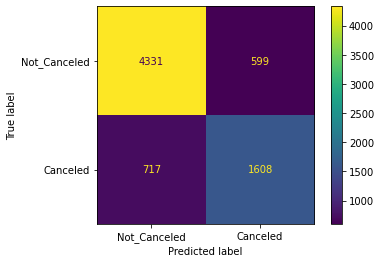

In [11]:
# Making models with both a kNN classifier and weighted kNN classifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplot for graphs
%matplotlib inline

hotel_res_labels = ["Not_Canceled", "Canceled"]

kNN_mod = KNeighborsClassifier(n_neighbors = 3, weights = "uniform") 
# n_neighbors supplies the value for 'k'
kNN_mod.fit(train_data, train_sln)

kNN_mod_preds = kNN_mod.predict(test_data)

kNN_mod_acc = sklearn.metrics.accuracy_score(test_sln, kNN_mod_preds)

print("The accuracy score for a kNN algorithm at k = 3 is:", kNN_mod_acc)


The accuracy score for a kNN algorithm at k = 3 is: 0.8186078566505858


              Not_Canceled  Canceled
Not_Canceled          4331       599
Canceled               717      1608


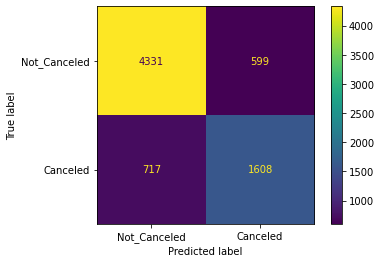

In [17]:
conf_mat = metrics.confusion_matrix(test_sln, kNN_mod_preds, labels = [0,1])

print(pandas.DataFrame(conf_mat,index = hotel_res_labels, columns = hotel_res_labels))

displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=hotel_res_labels)
displ.plot()
plt.show()


####w-kNN Model Results:
For the weighted kNN model, with all else being equal other than the weight placed on 'neighbors', the accuracy of the model stayed the same at $accuracy = 0.8186$. Additionally, the confusion matrix stayed the same for the w-kNN model on non-normalized data. 

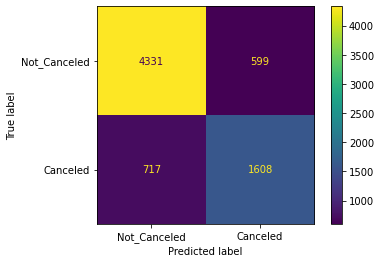



In [14]:
# Weighted kNN Classifier

w_kNN_mod = KNeighborsClassifier(n_neighbors = 3, weights = "distance") 
# n_neighbors supplies the value for 'k'
w_kNN_mod.fit(train_data, train_sln)

w_kNN_mod_preds = kNN_mod.predict(test_data)

w_kNN_mod_acc = sklearn.metrics.accuracy_score(test_sln, w_kNN_mod_preds)

print("The accuracy score for a weighted kNN algorithm at k = 3 is:", w_kNN_mod_acc)

# Interestingly enough, I tried several values for k and found that the lower values tended to give us a higher accuracy for the model
# This might be a hint for us that many of the variables have similar weights / importances to whether someone cancels their reservation or not


The accuracy score for a weighted kNN algorithm at k = 3 is: 0.8186078566505858


              Not_Canceled  Canceled
Not_Canceled          4331       599
Canceled               717      1608


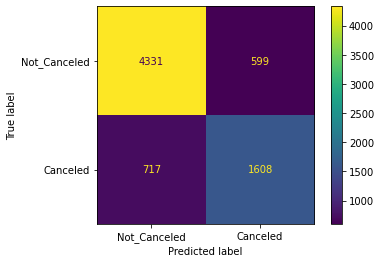

In [17]:
# Confusion Matrix for weighted kNN model
conf_mat_w_kNN = metrics.confusion_matrix(test_sln, w_kNN_mod_preds, labels = [0,1])

print(pandas.DataFrame(conf_mat_w_kNN,index = hotel_res_labels, columns = hotel_res_labels))

displ = ConfusionMatrixDisplay(confusion_matrix = conf_mat_w_kNN, display_labels = hotel_res_labels)
displ.plot()
plt.show()

####Decision Tree Results:

Getting to the decision tree model is where we really begin to see a change in the accuracy of models. For this model, $accuracy = 0.8207$, so this model beats the accuracy of both the kNN and w-kNN models, along with the dummy model. 

Additionally, from the tree created with this model we can directly show how certain factors might affect whether customers cancel their reservations or not. For instance, this chart shows us how lead time must be one of the more important variables, and possibly one of the purest ones since it is the root node. We can also see that the number of special requests someone makes, and the average price of a room must have a substantial affect on whether a reservation is canceled. 



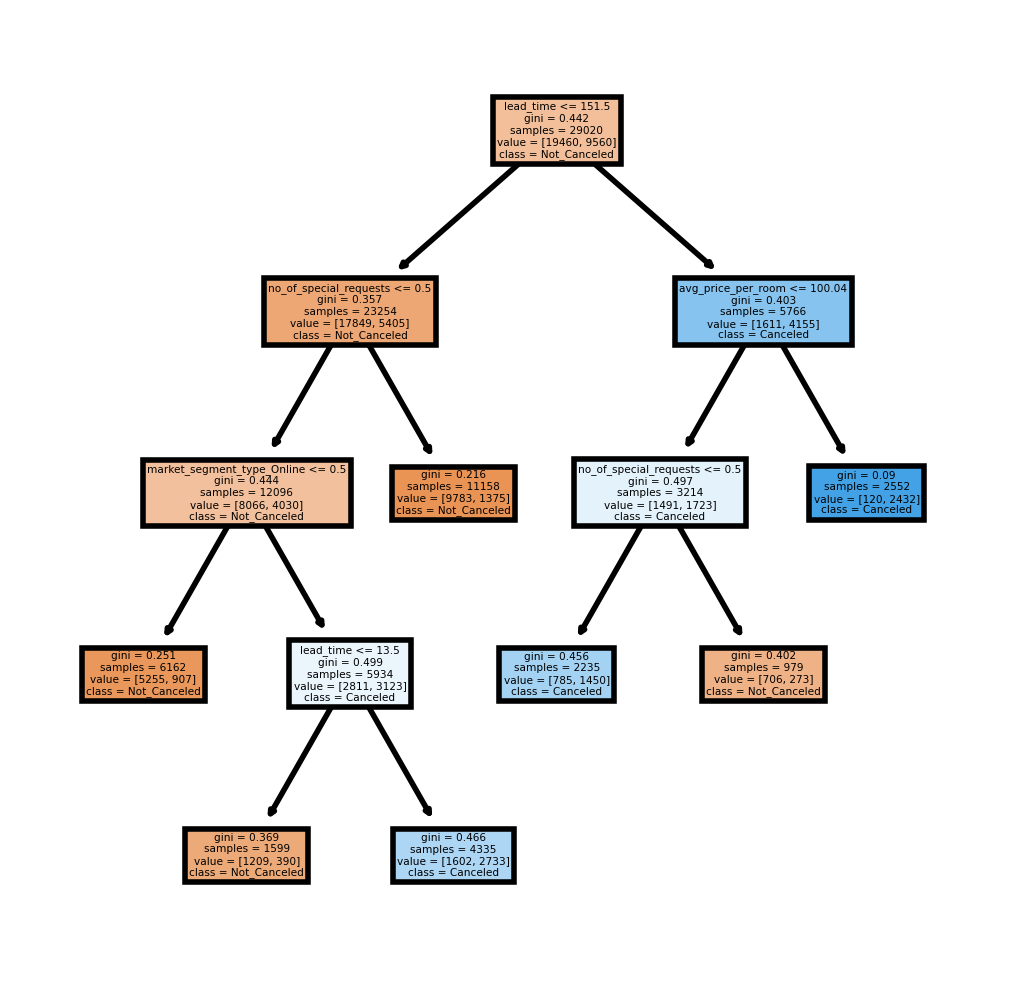

This non-default decision tree has an accuracy of: 0.8206753962784287


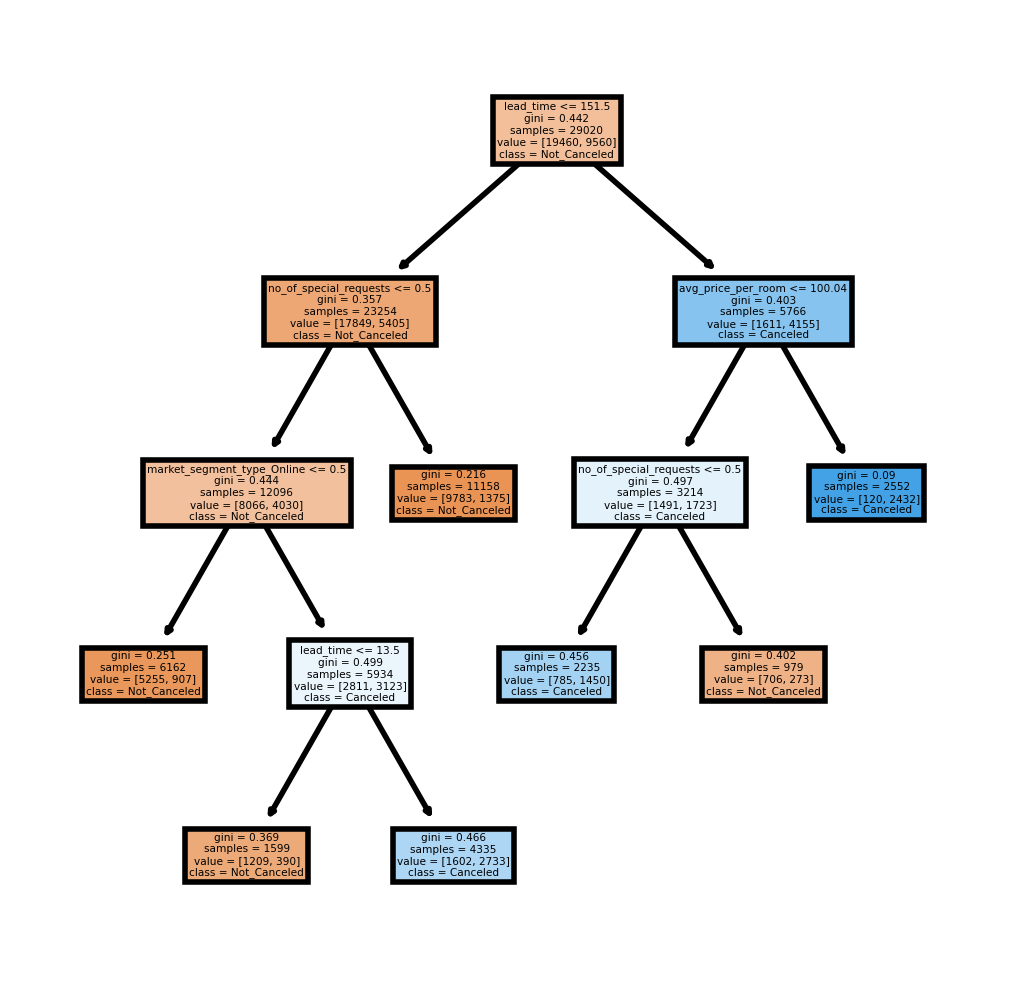

In [19]:
# Decision Tree based on non-normalized data


dt_non_norm = tree.DecisionTreeClassifier(splitter = "best", max_leaf_nodes = 7, 
                                          random_state = 54)
dt_non_norm.fit(train_data, train_sln)

dt_non_norm_preds = dt_non_norm.predict(test_data)
dt_non_norm_acc = sklearn.metrics.accuracy_score(test_sln, dt_non_norm_preds)

print("This non-default decision tree has an accuracy of:", dt_non_norm_acc)

# visualizing decision tree
import matplotlib.pyplot as plt

fn = predictors_with_dummies
cn = hotel_res_labels

fig, axes = plt.subplots(figsize = (3,3), dpi=400)
tree.plot_tree(dt_non_norm,
               feature_names = fn, 
               class_names=cn,
               filled = True);

####Random Forest Results:

Talk about results

In [22]:
# Random Forest on Non-Normalized Data

forest_non_norm = RandomForestClassifier(n_estimators = 600, random_state = 13, max_features = "sqrt")
forest_non_norm.fit(train_data, train_sln)

fnn_predictions = forest_non_norm.predict(test_data)
fnn_acc = sklearn.metrics.accuracy_score(test_sln, fnn_predictions)
print("The Random Forest with 600 trees has an accuracy of:", fnn_acc)


The Random Forest with 600 trees has an accuracy of: 0.9015851137146795


              Not_Canceled  Canceled
Not_Canceled          4656       274
Canceled               440      1885


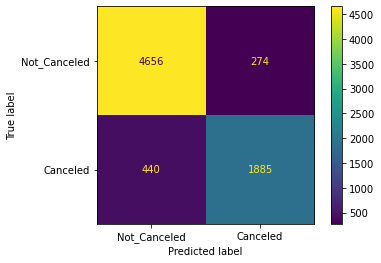

In [23]:
# Confusion Matrix for Random Forest
conf_mat_fnn = metrics.confusion_matrix(test_sln, fnn_predictions, labels = [0,1])

print(pandas.DataFrame(conf_mat_fnn , index = hotel_res_labels, columns = hotel_res_labels))

displ = ConfusionMatrixDisplay(confusion_matrix = conf_mat_fnn, display_labels = hotel_res_labels)
displ.plot()
plt.show()

### Models with Normalized Data:

The following section details the results of research with the kNN, w-kNN, decision tree, and random forest models on normalized data, and how these individual results compare to the experiments on non-normalized data. 


#### _Normalization Code:_

In [30]:
# First need to normalize the training / testing data
scaler = StandardScaler()
scaler.fit(train_data)

train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)

print(train_data_norm)

[[ 0.29420103 -0.26116014 -0.9353107  ... -0.16153741 -0.41176755
  -0.79149741]
 [ 0.29420103 -0.26116014  1.35415129 ... -0.16153741 -1.1864919
   0.4821665 ]
 [-1.63478988 -0.26116014 -0.9353107  ... -0.16153741 -0.92220087
  -0.79149741]
 ...
 [-1.63478988 -0.26116014 -0.9353107  ... -0.16153741 -0.24162311
  -0.79149741]
 [-1.63478988 -0.26116014  1.35415129 ... -0.16153741  1.17624722
   0.4821665 ]
 [-1.63478988 -0.26116014 -0.9353107  ... -0.16153741  1.57325091
   0.4821665 ]]


####kNN Model Results:

Talk about results

In [32]:
# Same models as before, but this time modelled on normalized data. 

kNN_mod_norm = KNeighborsClassifier(n_neighbors = 3, weights = "uniform") 
# n_neighbors supplies the value for 'k'
kNN_mod_norm.fit(train_data_norm, train_sln)

kNN_mod_norm_preds = kNN_mod.predict(test_data_norm)

kNN_mod_norm_acc = sklearn.metrics.accuracy_score(test_sln, kNN_mod_preds)

print("The accuracy score for a kNN algorithm at k = 3 is:", kNN_mod_norm_acc)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The accuracy score for a kNN algorithm at k = 3 is: 0.8186078566505858


####w-kNN Model Results:

Talk about results

In [36]:
# Weighted kNN Classifier with Normalized Data

w_kNN_mod_norm = KNeighborsClassifier(n_neighbors = 3, weights = "distance") 
# n_neighbors supplies the value for 'k'
w_kNN_mod_norm.fit(train_data_norm, train_sln)

w_kNN_mod_norm_preds = kNN_mod.predict(test_data_norm)

w_kNN_mod_norm_acc = sklearn.metrics.accuracy_score(test_sln, w_kNN_mod_norm_preds)

print("The accuracy score for a weighted kNN algorithm at k = 3 is:", w_kNN_mod_norm_acc)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The accuracy score for a weighted kNN algorithm at k = 3 is: 0.6795313576843556


####Decision Tree Results:

Talk about results

This non-default decision tree has an accuracy of: 0.8206753962784287


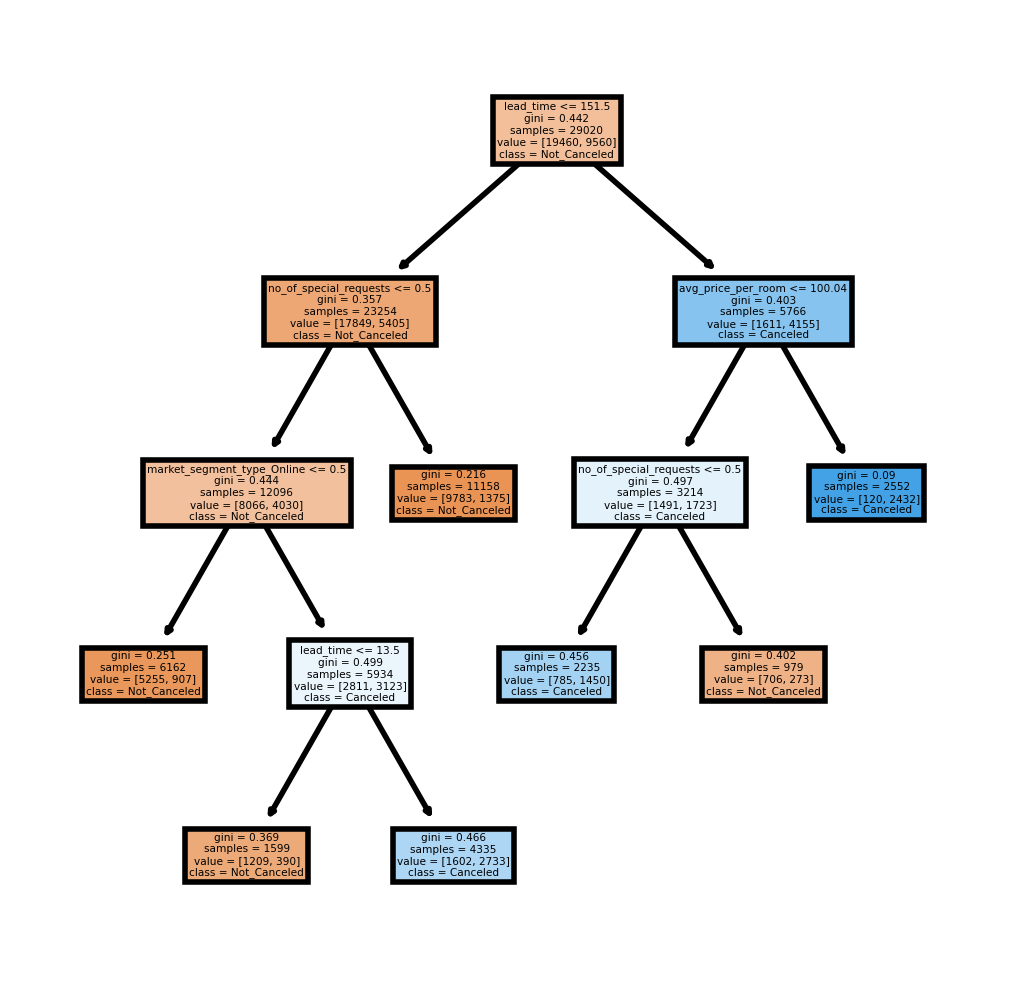

In [37]:
dt_norm = tree.DecisionTreeClassifier(splitter = "best", max_leaf_nodes = 7, 
                                          random_state = 54)
dt_norm.fit(train_data, train_sln)

dt_norm_preds = dt_norm.predict(test_data)
dt_norm_acc = sklearn.metrics.accuracy_score(test_sln, dt_norm_preds)

print("This non-default decision tree has an accuracy of:", dt_norm_acc)

# visualizing decision tree
import matplotlib.pyplot as plt

fn = predictors_with_dummies
cn = hotel_res_labels

fig, axes = plt.subplots(figsize = (3,3), dpi=400)
tree.plot_tree(dt_non_norm,
               feature_names = fn, 
               class_names=cn,
               filled = True);

####Random Forest Results:

Talk about results

In [38]:
# Random Forest on Normalized Data

forest_norm = RandomForestClassifier(n_estimators = 600, random_state = 13, max_features = "sqrt")
forest_norm.fit(train_data, train_sln)

fn_predictions = forest_norm.predict(test_data)
fn_acc = sklearn.metrics.accuracy_score(test_sln, fn_predictions)
print("The Random Forest with 600 trees has an accuracy of:", fnn_acc)

The Random Forest with 600 trees has an accuracy of: 0.9015851137146795


### Parameter Tuning in Models
The following section details the results tuning the parameters k, n, and m for the corresponding kNN, w-kNN, decision tree, and random forest models. 

It should additionally be noted that the parameter tuning took place on the non-normalized data, and would like have differing results when done on normalized data. 


#### Bump #2: `For` loops in Parameter Tuning
The second key _bump in the road_ I experienced occurred when I began to tune my parameters. For one reason or another, when I was beginning to tune the parameters my for loops were not working as expected, and kept throwing errors when I ran them. Eventually, I decided to take a break for a while, and when I came back to work, the `for` loops decided to start working after I re-ran all of my code. 

My best guess is that the issue had to do with my session timing out, so all that had to happen was reloading the data. 

####kNN Model Results:

Talk about results

In [12]:
# Graph from Tuning k in the kNN algorithm


k_vals = [1, 5, 10, 20, 40, 80, 100, 125, 175, 225, 230]

acc_at_k = [] # Initializing a list, acc_at_k, for the resulting accuracies at differing values of k

for k in k_vals:
  knn_model_loop = KNeighborsClassifier(n_neighbors = k, weights = "uniform")
  knn_model_loop.fit(train_data, train_sln)

  predictions = knn_model_loop.predict(test_data)
  
  accuracy_at_k = sklearn.metrics.accuracy_score(test_sln, predictions)
  acc_at_k.append(accuracy_at_k)

# Checking that the for loop accurately collected the values I wanted it to
acc_at_k


[0.8212267401791867,
 0.8128187456926258,
 0.8162646450723638,
 0.8092350103376982,
 0.8005513439007581,
 0.7898001378359751,
 0.7904893177119228,
 0.780565127498277,
 0.7824948311509304,
 0.7751895244658856,
 0.7762922122674017]

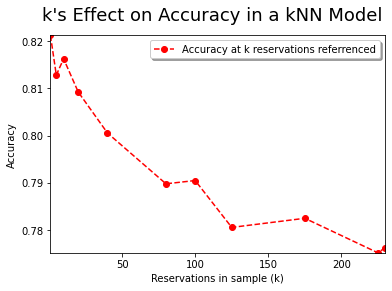

In [39]:
number_of_points = len(acc_at_k) # get the number of points to be in the graph

# Plot this bad boy
plt.suptitle("k's Effect on Accuracy in a kNN Model", fontsize=18)
plt.xlabel('Reservations in sample (k)')
plt.ylabel('Accuracy')
plt.plot(k_vals, acc_at_k, 'ro--', label='Accuracy at k reservations referrenced')
plt.legend(loc='upper right', shadow=True)
plt.axis([min(k_vals), max(k_vals), min(acc_at_k), max(acc_at_k)])
plt.show()

####w-kNN Model Results:

Talk about results

In [18]:
# Weighted kNN Model parameter tuning

k_vals_wkNN = [1, 5, 10, 20, 40, 80, 100, 125, 175, 225, 230]

acc_at_k_wkNN = [] # Initializing a list, acc_at_k, for the resulting accuracies at differing values of k

for k in k_vals:
  w_knn_model_loop = KNeighborsClassifier(n_neighbors = k, weights = "distance")
  w_knn_model_loop.fit(train_data, train_sln)

  predictions = w_knn_model_loop.predict(test_data)
  
  accuracy_at_k_wkNN = sklearn.metrics.accuracy_score(test_sln, predictions)
  acc_at_k_wkNN.append(accuracy_at_k_wkNN)

# Checking that the for loop accurately collected the values I wanted it to
acc_at_k_wkNN

[0.8212267401791867,
 0.8366643694004136,
 0.8452101998621641,
 0.8472777394900068,
 0.8470020675396278,
 0.8485182632667126,
 0.8486560992419021,
 0.8483804272915231,
 0.8482425913163336,
 0.8485182632667126,
 0.8485182632667126]

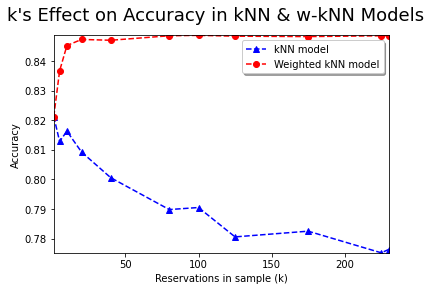

In [45]:
number_of_points = len(acc_at_k_wkNN) # get the number of points to be in the graph

# Plot this bad boy
plt.suptitle("k's Effect on Accuracy in kNN & w-kNN Models", fontsize=18)
plt.xlabel('Reservations in sample (k)')
plt.ylabel('Accuracy')
plt.plot(k_vals, acc_at_k, 'b^--', label='kNN model')
plt.plot(k_vals_wkNN, acc_at_k_wkNN, 'ro--', label='Weighted kNN model')

plt.legend(loc='best', shadow=True)
plt.axis([min(k_vals_wkNN), max(k_vals_wkNN), min(acc_at_k), max(acc_at_k_wkNN)])
plt.show()

####Decision Tree Results:

Talk about results

In [20]:
# Decision Tree Parameter Tuning
# Deciding to tune the max leaf nodes

m_vals_dt = [2, 3, 4, 5, 6, 7, 8, 9, 10]

acc_at_m_nodes = [] # Initializing a list, acc_at_m_nodes, for the resulting accuracies at differing values of m

for m in m_vals_dt:
  dt_loop = tree.DecisionTreeClassifier(splitter = "best", max_leaf_nodes = m, random_state = 53)
  dt_loop.fit(train_data, train_sln)
  
  dt_pred = dt_loop.predict(test_data)
  accuracy_at_m_nodes = sklearn.metrics.accuracy_score(test_sln, dt_pred)
  acc_at_m_nodes.append(accuracy_at_m_nodes)


acc_at_m_nodes

[0.7685733976567884,
 0.7685733976567884,
 0.7751895244658856,
 0.7751895244658856,
 0.8090971743625086,
 0.8206753962784287,
 0.8208132322536182,
 0.8208132322536182,
 0.8332184700206754]

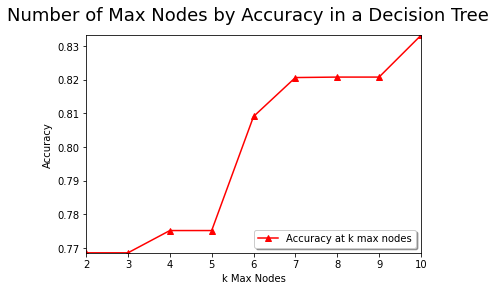

In [21]:
number_of_points = len(acc_at_m_nodes) # get the number of points to be in the graph

# Plot this bad boy
plt.suptitle("Number of Max Nodes by Accuracy in a Decision Tree", fontsize=18)
plt.xlabel('k Max Nodes')
plt.ylabel('Accuracy')
plt.plot(m_vals_dt, acc_at_m_nodes, 'r^-', label = 'Accuracy at k max nodes')
plt.legend(loc='lower right', shadow=True)
plt.axis([min(m_vals_dt), max(m_vals_dt), min(acc_at_m_nodes), max(acc_at_m_nodes)])
plt.show()

####Random Forest Results:

Talk about results

In [26]:
# Random Forest Parameter Tuning
# Deciding to tune the number of estimators in the random forest (n, or trees)

n_vals_dt = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]

acc_at_n_est = [] # Initializing a list, acc_at_n_est, for the resulting accuracies at differing #'s of estimators

for n in n_vals_dt:
  rf_tune = RandomForestClassifier(n_estimators = n, random_state = 13, max_features = "sqrt")
  rf_tune.fit(train_data, train_sln)

  rf_tune_pred = rf_tune.predict(test_data)
  accuracy_at_n_est = sklearn.metrics.accuracy_score(test_sln, rf_tune_pred)
  acc_at_n_est.append(accuracy_at_n_est)


acc_at_n_est

[0.898828394210889,
 0.89855272226051,
 0.8995175740868366,
 0.9006202618883529,
 0.9011716057891109,
 0.9004824259131633,
 0.9006202618883529,
 0.9011716057891109,
 0.90144727773949,
 0.9015851137146795,
 0.9015851137146795,
 0.9021364576154376,
 0.9024121295658166]

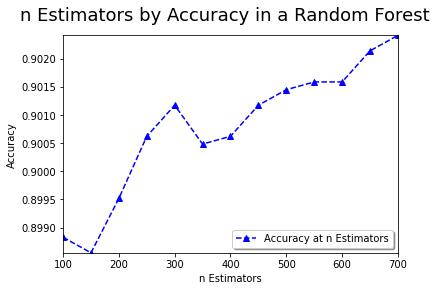

In [28]:
number_of_points = len(acc_at_n_est) # get the number of points to be in the graph

# Plot this bad boy
plt.suptitle("n Estimators by Accuracy in a Random Forest", fontsize=18)
plt.xlabel('n Estimators')
plt.ylabel('Accuracy')
plt.plot(n_vals_dt, acc_at_n_est, 'b^--', label = 'Accuracy at n Estimators')
plt.legend(loc='lower right', shadow=True)
plt.axis([min(n_vals_dt), max(n_vals_dt), min(acc_at_n_est), max(acc_at_n_est)])
plt.show()

---
## Conclusions
---

The structure of the conclusion is shown as follows:
1. Preferred Models
2. Notes of Interest
  - Worst Performing Models
  - Variable Importance Chart
3. Recommendations

The conclusion will go over everything from which models are preferred based on their accuracies and other factors, notes of interest that came up through this research, and recommendations on what's next for this hotel company. 

### Preferred Models

### Notes of Interest

#### Worst Performing Models

#### Feature Importance Chart
---
In taking a look at the feature importance chart that can be modelled on this data, I learned very quickly that there was one variable that outperformed the rest: **lead_time**

When looking into the values shown on the chart, it should be noted that values closer to 0 indicate lesser importance in predicting whether a customer will cancel their reservation, so the more positive a number is, the more important it will be in predicting the end outcome. 

We can see that `lead_time` is shown to be most important with a value slightly greter than 0.35, followed by a distance by `avg_price_per_room` (~ 0.18), `no_of_special_requests` (~ 0.12), and `arrival_month` at around 0.10. 


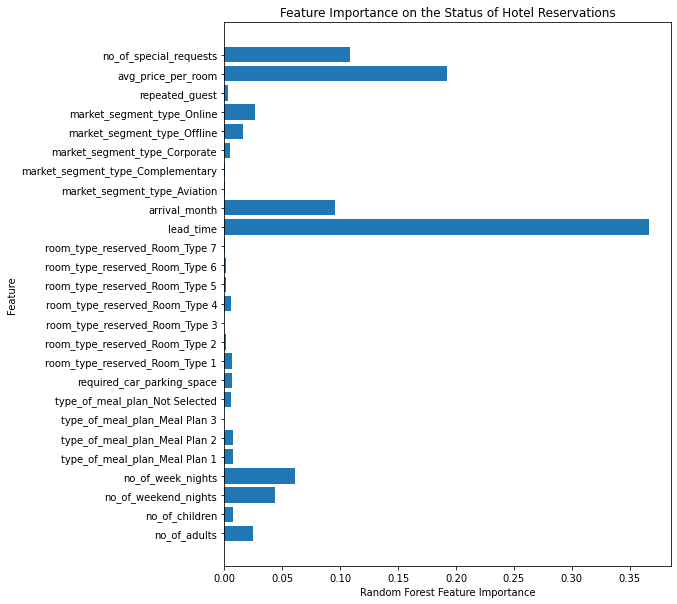


From this chart, further research could be done to see how the accuracy of these various models would be influenced through utilizing variables with an importance meeting some specified threshold of `importance`. 




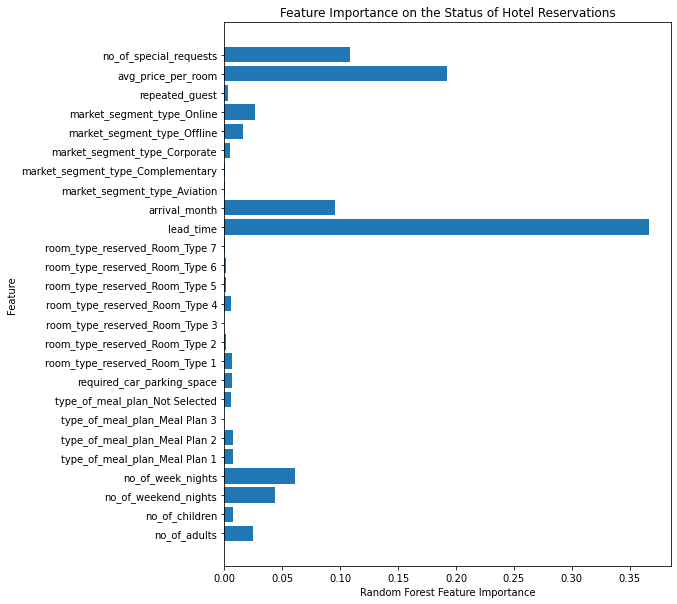

In [29]:
# Feature Importance Chart: Random Forest

index = range(len(predictors_with_dummies)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table bigger so the text is readable
plt.barh(index ,forest_non_norm.feature_importances_, height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index, predictors_with_dummies) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance on the Status of Hotel Reservations")
plt.show()

Looking at the feature importance chart, it's fairly obvious that lead_time is the most important variable, with other variables like arrival month also being somewhat important. 